# Performance of BinaryNet

In [1]:
% matplotlib inline

import os
import matplotlib.pyplot as plt

from scripts.util import ExpResults

In [2]:
plotproperties = {'font.size': 13,
                  'axes.titlesize': 'xx-large',
                  'axes.labelsize': 'xx-large',
                  'xtick.labelsize': 'xx-large',
                  'xtick.major.size': 7,
                  'xtick.minor.size': 5,
                  'ytick.labelsize': 'xx-large',
                  'ytick.major.size': 7,
                  'ytick.minor.size': 5,
                  'legend.fontsize': 'xx-large',
                  'figure.figsize': (7, 6),
                  'savefig.dpi': 300,
                  'savefig.format': 'jpg'}

import matplotlib as mpl
mpl.rcParams.update(plotproperties)

## Parameters and definitions

In [4]:
log_dir = '/home/rbodo/.snntoolbox/data/cifar10'
runlabel_sign = log_dir + '/binarynet_sign/log/gui/02'
path_sign = os.path.join(log_dir, runlabel_sign)
runlabel_heaviside = log_dir + '/binarynet_heaviside/log/gui/01'
path_heaviside = os.path.join(log_dir, runlabel_heaviside)

scale = 1e3  # Scale from MOps to GOps

In [11]:
exp_sign = ExpResults(path_sign, 'sign', '.', scale=scale)
exp_heaviside = ExpResults(path_heaviside, 'heaviside', '.', 'green', scale=scale)
experiments = [exp_sign, exp_heaviside]

## Plot error vs operations

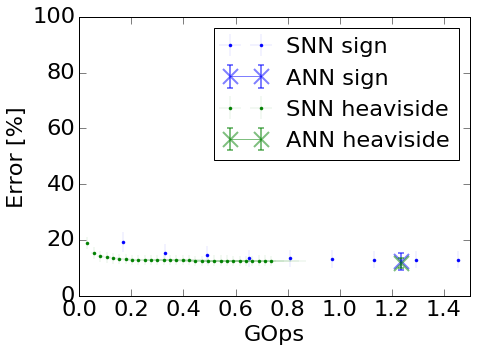

In [14]:
show_numbers = False

plt.figure(figsize=(7, 5))

for exp in experiments:
    plt.errorbar(exp.mean_computations_t, exp.e1_mean, xerr=exp.std_computations_t,
                 yerr=exp.e1_confidence95, fmt=exp.marker, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)
    plt.errorbar(exp.operations_ann, exp.e1_ann, marker='x', label='ANN '+exp.label, color=exp.color1, markersize=15,
                 yerr=exp.e1_confidence95_ann, elinewidth=2, capthick=2, markeredgewidth=2, alpha=0.5)

exp = experiments[0]
if show_numbers:
    plt.annotate('({:.2f}, {:.2f})'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.15, exp.e1_ann + 10), color=exp.color1)
    plt.annotate('({:.2f}, {:.2f})'.format(exp.op1_optimal, exp.e1_optimal), xy=(exp.op1_optimal, exp.e1_optimal),
                 xytext=(exp.op1_optimal, exp.e1_optimal + 10),
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

exp = experiments[1]
if show_numbers:
    plt.annotate('({:.2f}, {:.2f})'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.15, exp.e1_ann + 10), color=exp.color1)
    plt.annotate('({:.2f}, {:.2f})'.format(exp.op1_optimal, exp.e1_optimal), xy=(exp.op1_optimal, exp.e1_optimal),
                 xytext=(exp.op1_optimal, exp.e1_optimal + 10),
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

plt.xlim(0, 1.5)
plt.ylim(0, 100)
plt.ylabel('Error [%]')
plt.xlabel('GOps')
plt.legend(loc='upper right')
# plt.title('ANN vs SNN performance')
plt.savefig(os.path.join(log_dir, 'err_vs_ops'), bbox_inches='tight')

In [13]:
for exp in experiments:
    print('SNN {}: ({:.2f} GOps/frame, {:.2f} %)'.format(exp.label, exp.op1_optimal, exp.e1_optimal))
    print('SNN {}: ({:.2f} GOps/frame, {:.2f} %)'.format(exp.label, exp.op1_0, exp.e1_0))
    print('SNN {}: ({:.2f} GOps/frame, {:.2f} %)'.format(exp.label, exp.op1_1, exp.e1_1))
    print('ANN {}: ({:.2f} GOps/frame, {:.2f} %)'.format(exp.label, exp.operations_ann, exp.e1_ann))

SNN sign: (0.33 GOps/frame, 15.32 %)
SNN sign: (1.13 GOps/frame, 12.98 %)
SNN sign: (0.65 GOps/frame, 13.98 %)
ANN sign: (1.23 GOps/frame, 12.34 %)
SNN heaviside: (0.06 GOps/frame, 15.36 %)
SNN heaviside: (0.59 GOps/frame, 12.48 %)
SNN heaviside: (0.13 GOps/frame, 13.48 %)
ANN heaviside: (1.23 GOps/frame, 11.68 %)
